In [1]:
%matplotlib widget

In [2]:
# Reading in data and creating training and testing split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)



In [4]:
from sklearn.tree import DecisionTreeClassifier

# Fit the classifier and get feature importances
    
clf = DecisionTreeClassifier().fit(X_train2,y_train2)


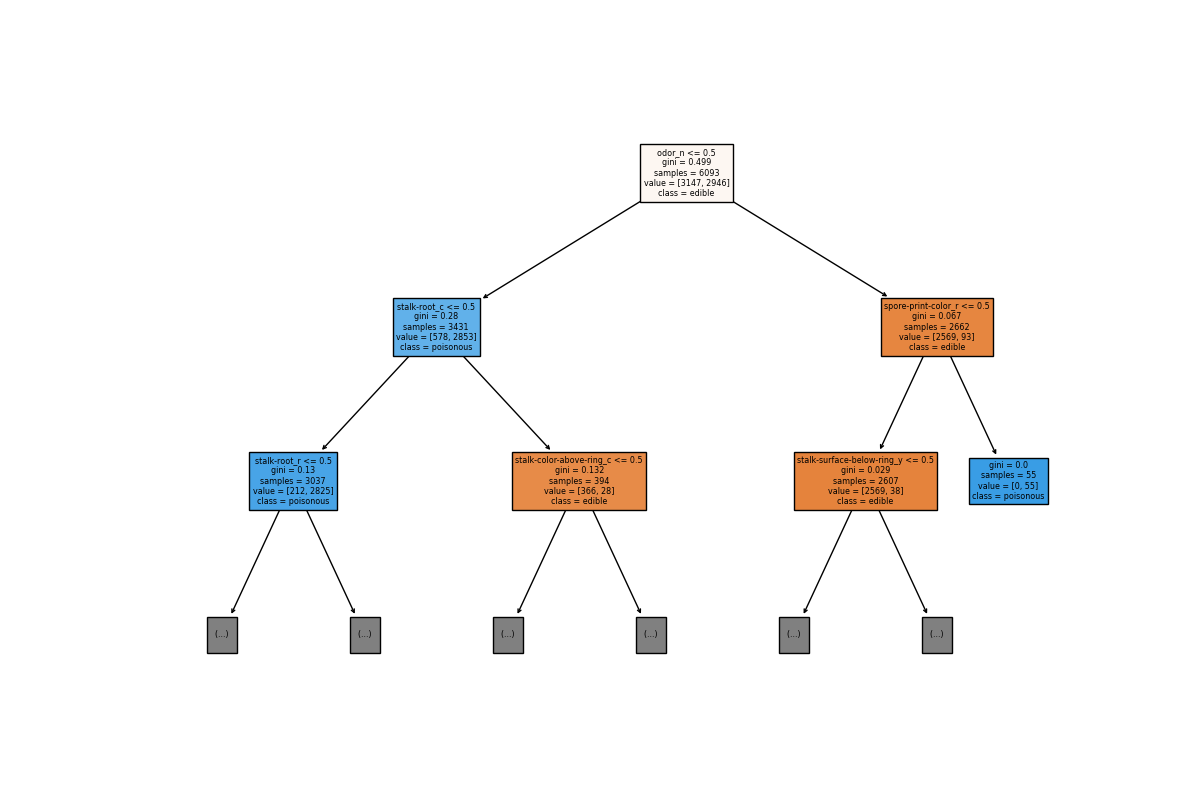

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, max_depth=2, feature_names=X_mush.columns, class_names=['edible', 'poisonous'], filled=True)
plt.show()


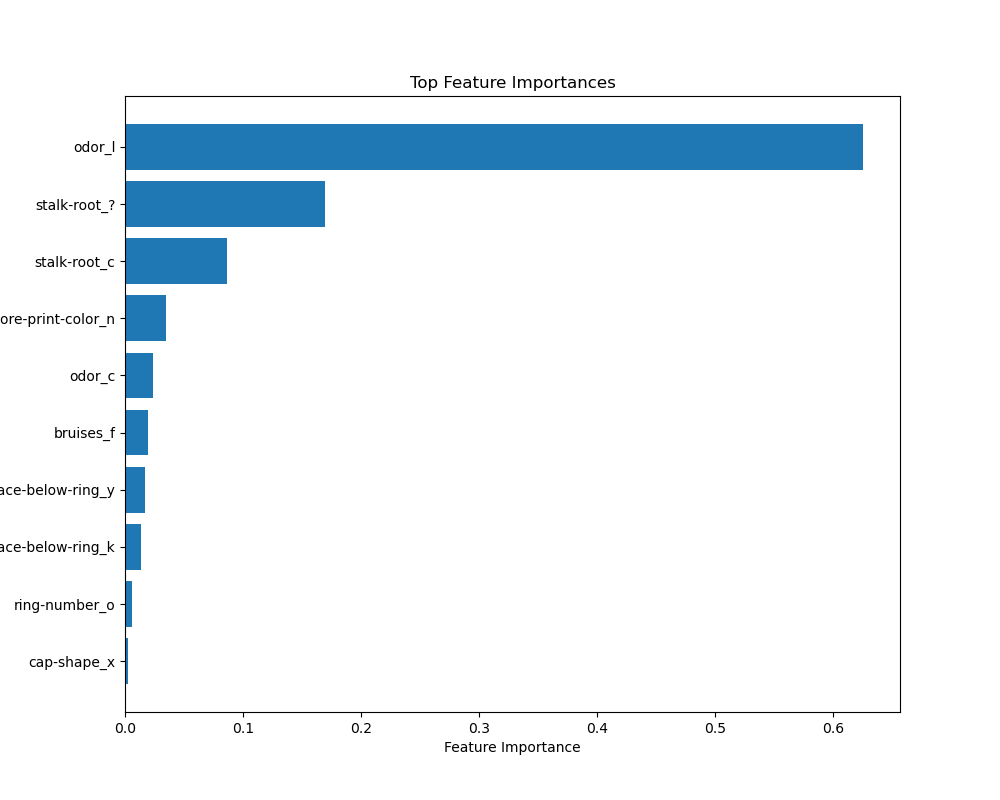

In [6]:
#Evaluate feature importance
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Select top features to display
top_n = 10
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = mush_df2.columns[top_indices]


# Create a horizontal bar plot adn visualise feature importance
plt.figure(figsize=(10, 8))
plt.title("Top Feature Importances")
plt.barh(range(len(top_indices)), top_importances, align="center")
plt.yticks(range(len(top_indices)), top_features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

In [7]:
# Training and optimising SVC model on dataset

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

# Defining a range of values for the parameter 'gamma'
param_range = np.logspace(-5,1,6)

# Performing validation curve analysis to assess model performance across different gamma values
train_scores, test_scores = validation_curve(SVC(kernel = 'rbf', C=1,random_state=0), X_mush, y_mush,
                                            param_name='gamma',
                                            param_range=param_range, cv=3, n_jobs=2)
    

# Calculating average test and train scores across different parameter values
test_scores_avg = np.mean(test_scores, axis =1)
train_scores_avg = np.mean(train_scores, axis =1)
    

 

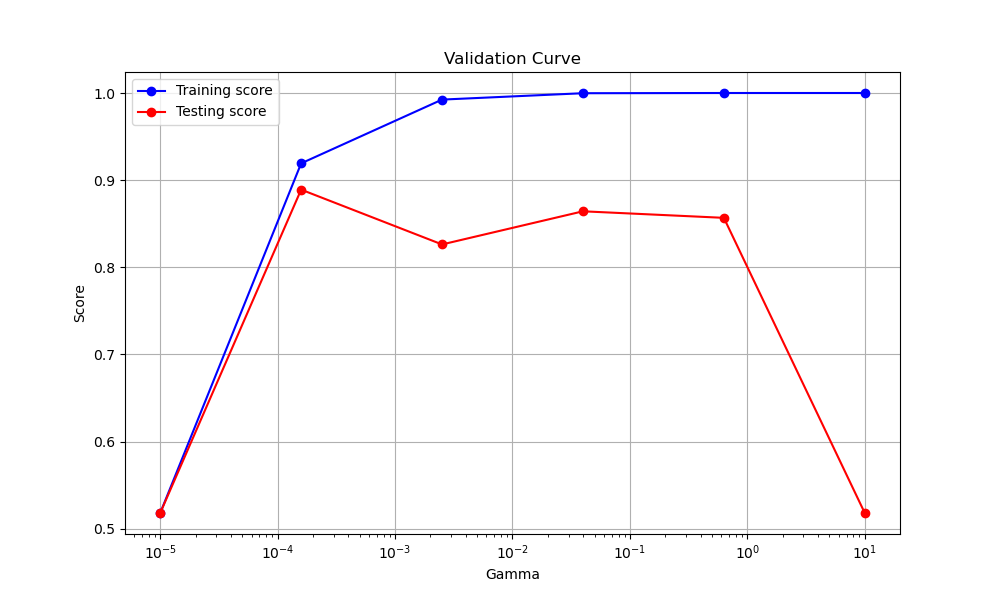

In [8]:
# Visualising Validation curven for gamma values cross-validation 
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_avg, label='Training score', color='blue', marker='o')
plt.plot(param_range, test_scores_avg, label='Testing score', color='red', marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()